In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix
import random
%matplotlib inline

In [287]:
def relu(x):
    # print("relu: {}".format(x))
    return x  * (x > 0)

def relu_derivative(x):
    return 1. * (x > 0)

In [288]:
rand_x = np.random.uniform(size=(1000,2)) * np.random.choice([-1,1],size=(1000,2))
cls = np.logical_xor(rand_x[:,0] > 0, rand_x[:,1] > 0)

In [289]:
labels = []
for truth in cls:
    if truth == True:
        labels.append(-1)
    else:
        labels.append(1)

In [290]:
# X = np.array([[-1,-1],
#               [-1,1],
#               [1, -1],
#               [1,1]])
# y = np.array([1,-1,-1,1])
X = rand_x
y = np.array(labels)

In [291]:
class NeuralXOR(object):
    def __init__(self):
        
        # x1 ^ x2 = ~(x1 • x2) • (x1 + x2)

        # XOR Weights
        self.W1_NAND = [0.5,-1,-1] # First neuron of hidden layer  - b=0.5, w1=-1, w2=-1
        self.W1_OR   = [0.5,1,1]   # Second neuron of hidden layer - b=0.5, w1=1,  w2=1
        
        self.W2_AND = np.array([-1.5,1,1]) # Output neuron - b=-1.5, w1=1, w2=1
        
    def predict(self, X):
        self.y_NAND = np.dot(X,self.W1_NAND[1:]) + self.W1_NAND[0] # Dot product + bias for the NAND neuron
        self.y_OR   = np.dot(X,self.W1_OR[1:])   + self.W1_OR[0]   # Dot product + bias for the OR neuron
        
        self.y1     = relu(self.y_NAND) # Activation of the NAND neuron - hidden layer
        self.y2     = relu(self.y_OR)   # Activation of the   OR neuron - hidden layer
        
        self.y_AND = (self.y1 * self.W2_AND[1] + self.y2 * self.W2_AND[2]) + self.W2_AND[0] # Dot product + bias for the AND neuron
        
        self.y3 = relu(self.y_AND) # Activation for AND neuron - output layer
        
        classifier = lambda x: 1 if x > 0 else -1
        y_Hat = np.array(list(map(classifier,nn.y3))) # Threshold function for choosing class
        
        return y_Hat

In [292]:
nn = NeuralXOR()

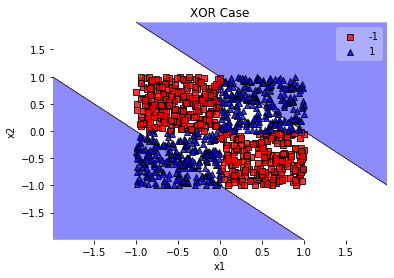

In [293]:
plot_decision_regions(X, y, clf=nn, colors='red,blue')
plt.title('XOR Case')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [294]:
print(classification_report(y,nn.predict(X)))

              precision    recall  f1-score   support

          -1       0.65      1.00      0.79       488
           1       1.00      0.48      0.65       512

    accuracy                           0.73      1000
   macro avg       0.82      0.74      0.72      1000
weighted avg       0.83      0.73      0.72      1000



In [295]:
print(confusion_matrix(y,nn.predict(X)))

[[488   0]
 [266 246]]
